# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from math import ceil, floor
%matplotlib inline

locale.setlocale(locale.LC_ALL, 'es_VE.UTF-8')

# Define the "Set2" palette
palette = sns.color_palette()

# Update the palette dictionary with the new palette
colors = {
    # 'DP': palette[2],
    'GENETIC': palette[1],
    'GRASP': palette[2],
    'HEURISTICS': palette[3],
    'ITERATIVE_LS': palette[4],
    'LS_FLIP': palette[5],
    'LS_SWAP': palette[6],
    'SIMULATED_ANNEALING': palette[7],
    'TABU_SEARCH': palette[8],
    'SCATTER_SEARCH': palette[9],
    'ANTS': palette[0],
}
def plot_algorithms(df, value, variable, y, title, ylabel, logarithmic=False, zoom=False, format_value=True):
    fig, ax = plt.subplots(figsize=(10, 6))

    df_var = df[df[variable] == value]
    df_var = df_var.sort_values('Algorithm')
    results = df_var.groupby('Algorithm')[y].mean().reset_index()
    titleValue = value if not format_value else locale.format_string("%d", value, grouping=True)

    ax.bar(results['Algorithm'], results[y], color=[colors[algo] for algo in results['Algorithm']])

    ax.set_title(title + ' ' + titleValue)
    ax.set_xlabel('Algoritmo')
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    if logarithmic:
        ax.set_yscale('log')

    if zoom:
        ax.set_ylim([floor(df[y].min()), ceil(df[y].max())])

    plt.tight_layout()
    plt.show()


In [2]:
raw = pd.read_csv('src/test/resources/output.csv', sep=', ') 

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\1329081048.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw = pd.read_csv('src/test/resources/output.csv', sep=', ')


In [3]:
df = raw.copy()
df['Algorithm'] = df['Algorithm'].str.replace('KNAPSACK_', '')
df['Algorithm'] = df['Algorithm'].str.replace('LOCAL_SEARCH_', 'LS_')
df['Algorithm'] = df['Algorithm'].str.replace('_LOCAL_SEARCH', '_LS')
df.head()
# df[df['Algorithm'] == 'ITERATIVE_LS'].sort_values(['Size', 'Capacity'])

,Instance,Algorithm,Correlation,Size,Capacity,Expected,Obtained,Error,Time (ms)
0,knapPI_1_10000_10000_100,HEURISTICS,uncorrelated,10000,49805376,50106947,49886890,220057,243
1,knapPI_2_10000_10000_100,HEURISTICS,weakly correlated,10000,49805376,50229348,49953768,275580,242
2,knapPI_1_10000_10000_100,GENETIC,uncorrelated,10000,49805376,50106947,49752234,354713,8642
3,knapPI_1_10000_10000_100,TABU_SEARCH,uncorrelated,10000,49805376,50106947,49562332,544615,10217
4,knapPI_2_10000_10000_100,TABU_SEARCH,weakly correlated,10000,49805376,50229348,49894311,335037,11150


In [4]:
# df_ILS['Algorithm'] = df_ILS['Algorithm'].str.replace('KNAPSACK_ITERATIVE_LOCAL_SEARCH', 'ITERATIVE_LS')
# df.update(df_ILS)
# df.head()
# df_ILS[df_ILS['Algorithm'] == 'ITERATIVE_LS'].sort_values(['Size', 'Capacity'])
# df

In [5]:
no_terminado = df[['Algorithm', 'Size', 'Capacity', 'Obtained']][df['Obtained'] == -1].sort_values(by=['Algorithm', 'Size', 'Capacity'])
no_terminado[no_terminado['Algorithm'] == 'DP']

,Algorithm,Size,Capacity,Obtained
62,DP,10000,49576995,-1
65,DP,10000,49576995,-1
60,DP,10000,49805376,-1
61,DP,10000,49805376,-1
64,DP,10000,49805376,-1
63,DP,10000,59477985,-1


In [6]:
no_terminado[no_terminado['Algorithm'] != 'DP']

,Algorithm,Size,Capacity,Obtained


In [7]:
df = df[df['Obtained'] != -1]

In [8]:
df['Accuracy (%)'] = df['Obtained'] / df['Expected'] * 100

In [9]:
df['Algorithm'] = df['Algorithm'].str.replace('KNAPSACK_', '')
df['Algorithm'] = df['Algorithm'].str.replace('LOCAL_SEARCH_', 'LS_')
df['Algorithm'] = df['Algorithm'].str.replace('_LOCAL_SEARCH', '_LS')

# Analisis por numero de items

In [10]:
sizes = np.sort(df['Size'].unique())
size = sizes[0]

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


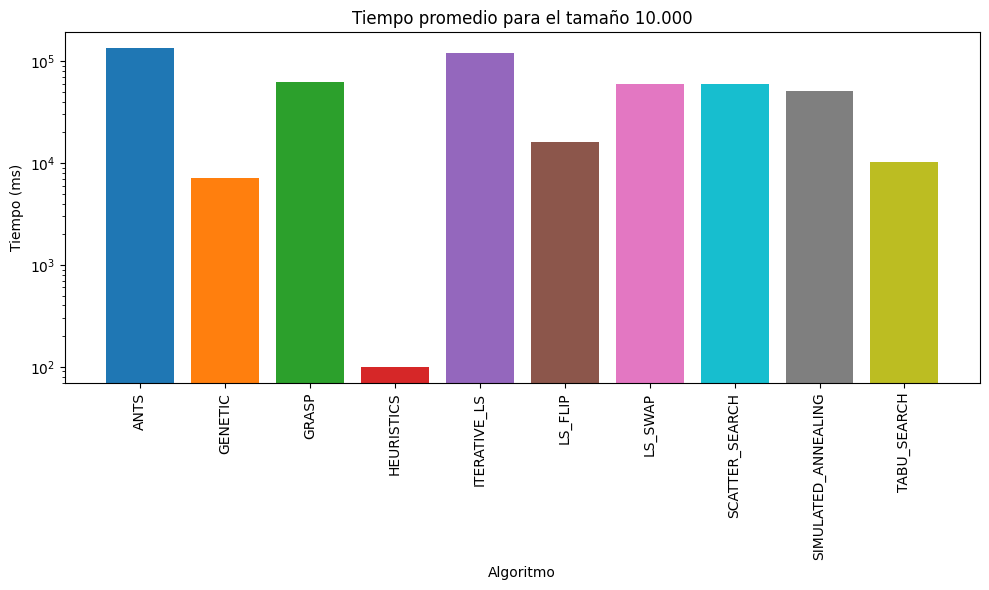

In [11]:
plot_algorithms(df, size, 'Size', 'Time (ms)', 'Tiempo promedio para el tamaño', 'Tiempo (ms)', logarithmic=True)

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


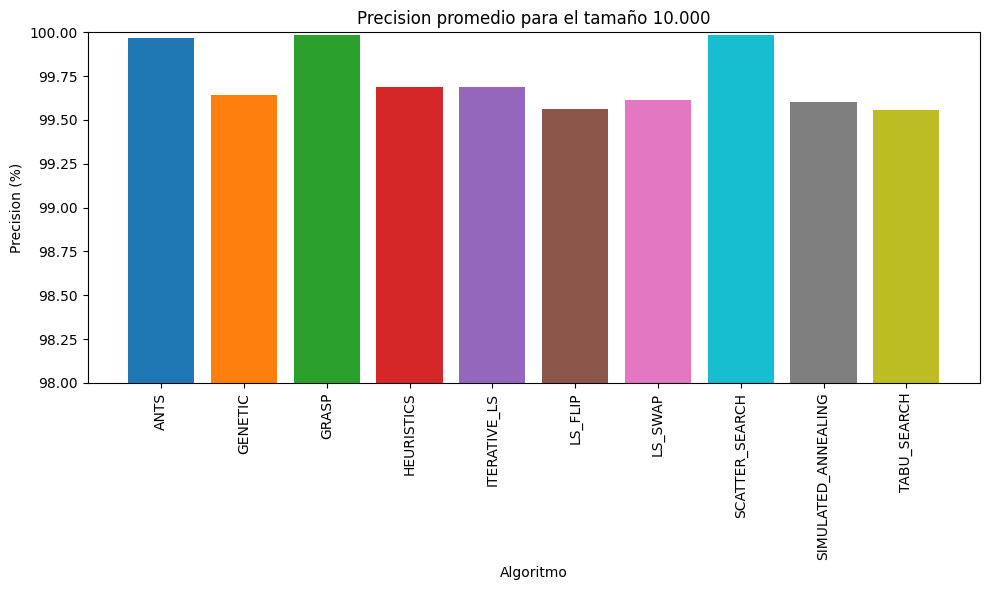

In [12]:
plot_algorithms(df, size, 'Size', 'Accuracy (%)', 'Precision promedio para el tamaño', 'Precision (%)', zoom=True)

In [13]:
(df[df['Algorithm'] == 'GRASP']['Obtained'] / df[df['Algorithm'] == 'GRASP']['Expected'] * 100).mean()

99.98630678034748

# Analisis por capacidad de la mochila

In [14]:
sorted_capacity = np.sort(df['Capacity'].unique())

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


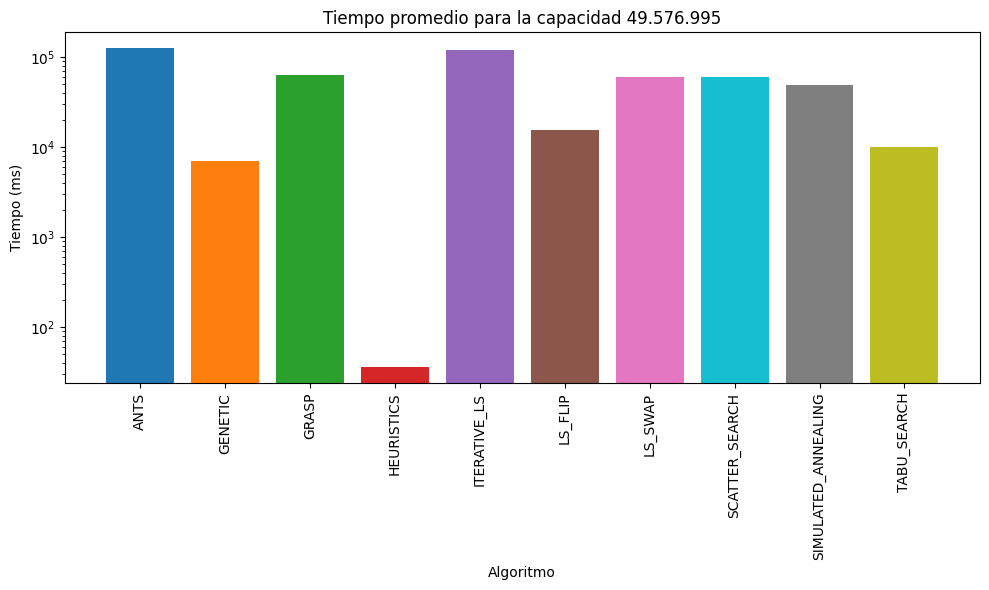

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


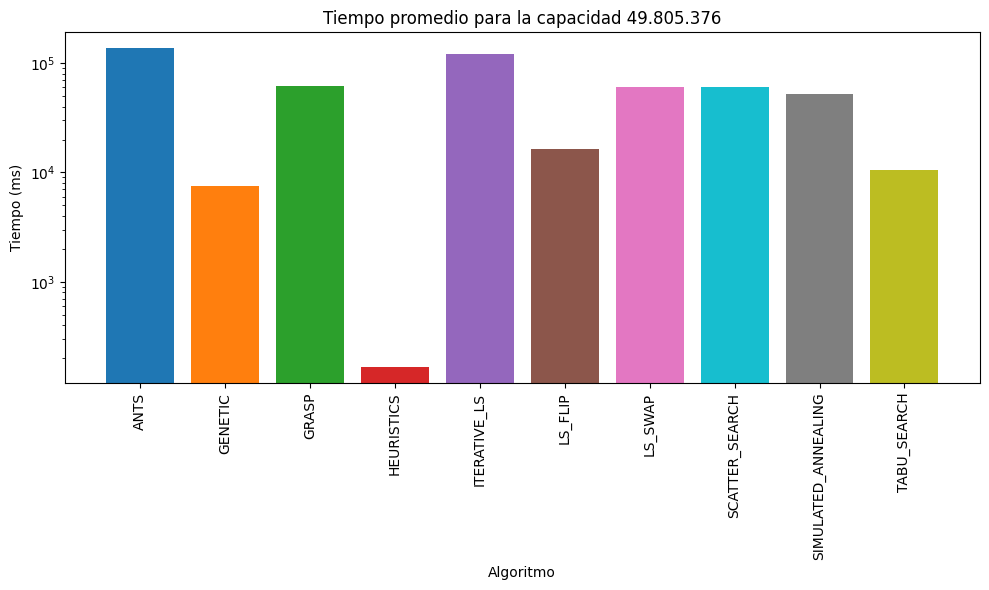

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


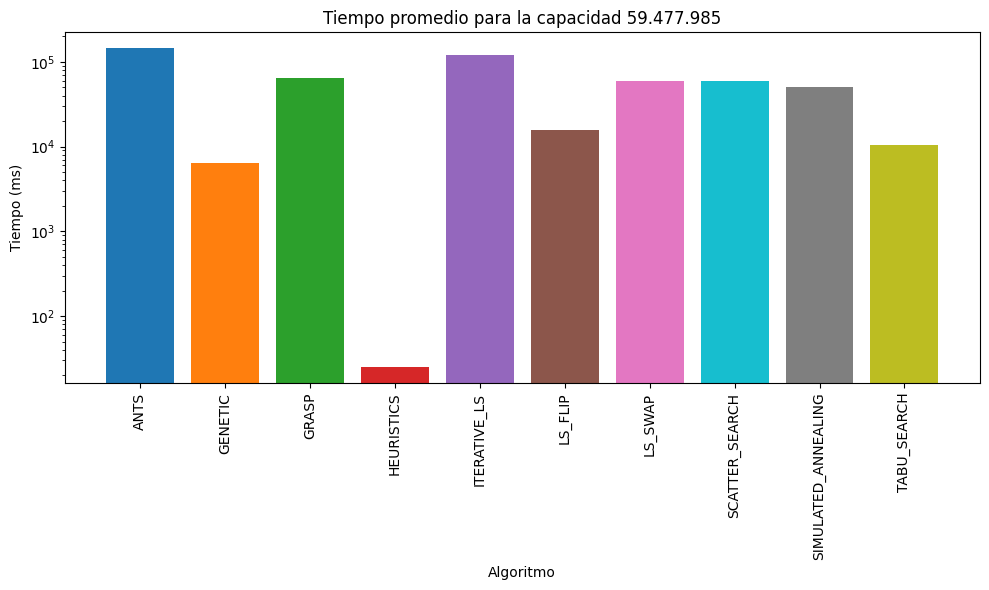

In [15]:
for capacity in sorted_capacity:
	plot_algorithms(df, capacity, 'Capacity', 'Time (ms)', 'Tiempo promedio para la capacidad', 'Tiempo (ms)', logarithmic=True)

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


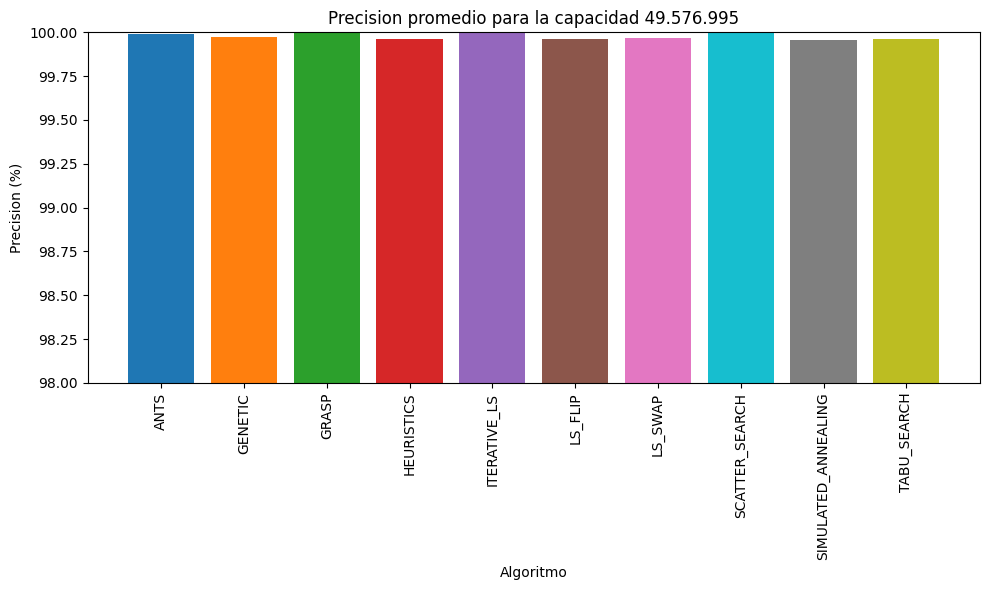

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


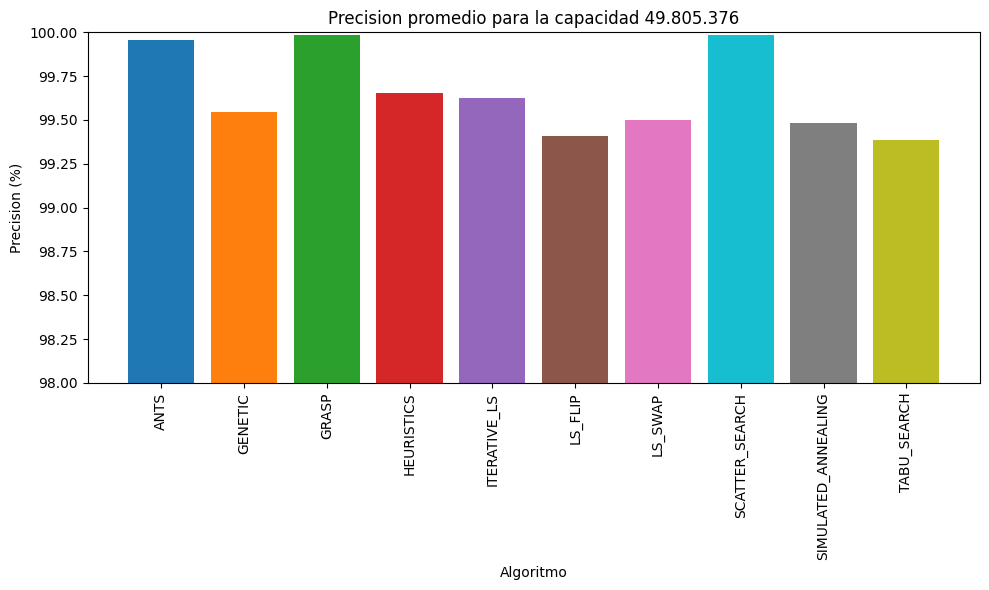

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


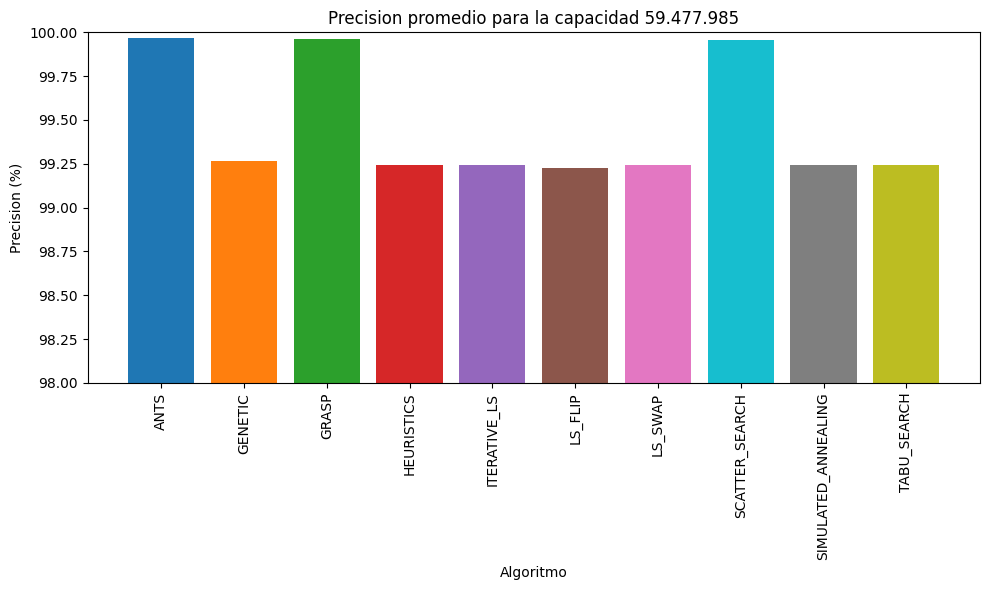

In [16]:
for capacity in sorted_capacity:
	plot_algorithms(df, capacity, 'Capacity', 'Accuracy (%)', 'Precision promedio para la capacidad', 'Precision (%)', zoom=True)

In [17]:
df.groupby('Algorithm')['Accuracy (%)'].mean().sort_values(ascending=False)

Algorithm
GRASP                  99.986307
SCATTER_SEARCH         99.985866
ANTS                   99.970400
HEURISTICS             99.688014
ITERATIVE_LS           99.686133
GENETIC                99.642116
LS_SWAP                99.613393
SIMULATED_ANNEALING    99.600978
LS_FLIP                99.563670
TABU_SEARCH            99.554679
Name: Accuracy (%), dtype: float64

In [18]:
# raw[(raw['Capacity'] > 4_000_000) & (raw['Algorithm'] == 'KNAPSACK_DP')].sort_values(['Capacity', 'Size'])
# raw[raw['Algorithm'] == 'KNAPSACK_DP'].sort_values(['Capacity', 'Size'])

pd.set_option('display.float_format', '{:.2f}'.format)
df['TrueSize'] = df['Size'] * np.power(2, df['Capacity'].apply(np.log2))
df['TimesSize'] = df['Size'] * df['Capacity']
df.sort_values(['TrueSize', 'Algorithm'])

,Instance,Algorithm,Correlation,Size,Capacity,Expected,Obtained,Error,Time (ms),Accuracy (%),TrueSize,TimesSize
23,knapPI_6_10000_10000_100,ANTS,subset sum,10000,49576995,49576995,49576980,15,112661,100.00,495769950000.00,495769950000
45,knapPI_3_10000_10000_100,ANTS,strongly correlated,10000,49576995,59526995,59515240,11755,135998,99.98,495769950000.00,495769950000
15,knapPI_3_10000_10000_100,GENETIC,strongly correlated,10000,49576995,59526995,59496979,30016,6268,99.95,495769950000.00,495769950000
48,knapPI_6_10000_10000_100,GENETIC,subset sum,10000,49576995,49576995,49576995,0,7526,100.00,495769950000.00,495769950000
29,knapPI_3_10000_10000_100,GRASP,strongly correlated,10000,49576995,59526995,59526972,23,60371,100.00,495769950000.00,495769950000
57,knapPI_6_10000_10000_100,GRASP,subset sum,10000,49576995,49576995,49576991,4,64699,100.00,495769950000.00,495769950000
9,knapPI_3_10000_10000_100,HEURISTICS,strongly correlated,10000,49576995,59526995,59484835,42160,57,99.93,495769950000.00,495769950000
42,knapPI_6_10000_10000_100,HEURISTICS,subset sum,10000,49576995,49576995,49576836,159,15,100.00,495769950000.00,495769950000
39,knapPI_3_10000_10000_100,ITERATIVE_LS,strongly correlated,10000,49576995,59526995,59522892,4103,120500,99.99,495769950000.00,495769950000
59,knapPI_6_10000_10000_100,ITERATIVE_LS,subset sum,10000,49576995,49576995,49576990,5,120316,100.00,495769950000.00,495769950000


# Analisis $n\times C$

In [19]:
df['nxC'] = df['Size'].apply(lambda x: locale.format_string("%d", x, grouping=True)) + 'x' + df['Capacity'].apply(lambda x: locale.format_string("%d", x, grouping=True))
nxC = df.sort_values(['Size', 'Capacity'])['nxC'].unique()
nxC

array(['10.000x49.576.995', '10.000x49.805.376', '10.000x59.477.985'],
      dtype=object)

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


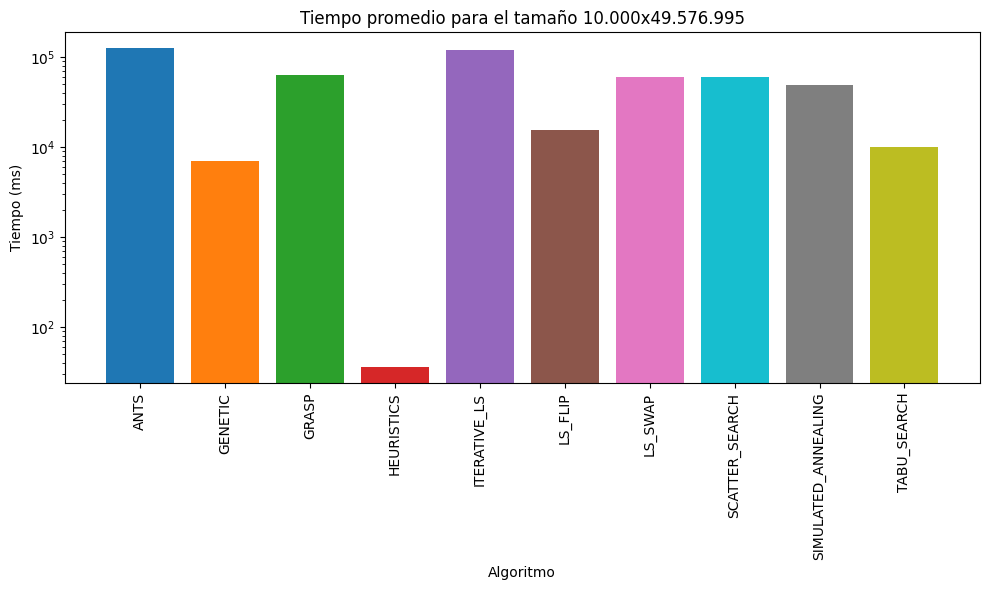

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


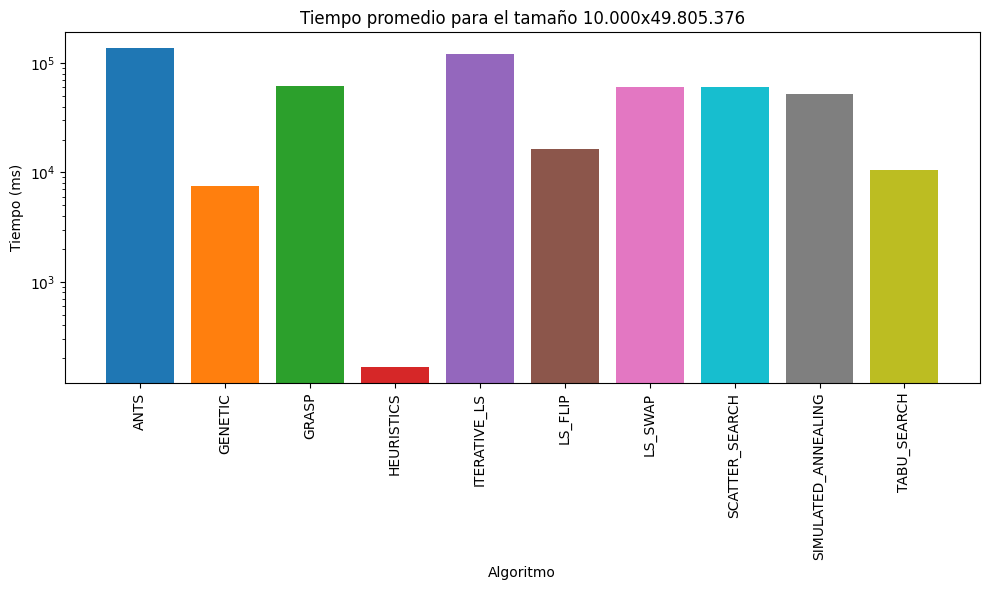

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


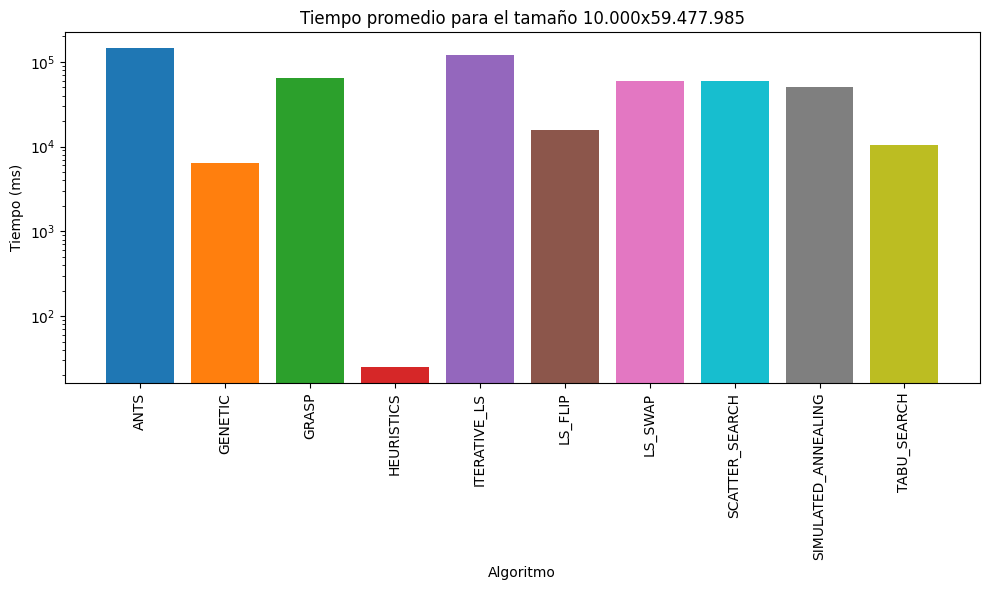

In [20]:
for x in nxC:
	plot_algorithms(df, x, 'nxC', 'Time (ms)', 'Tiempo promedio para el tamaño', 'Tiempo (ms)', logarithmic=True, format_value=False)

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


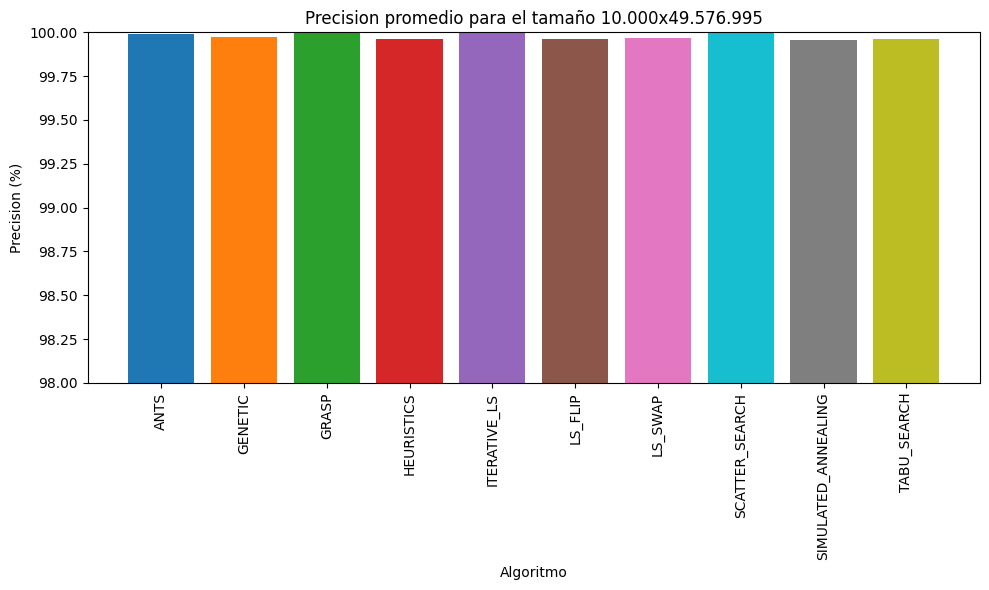

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


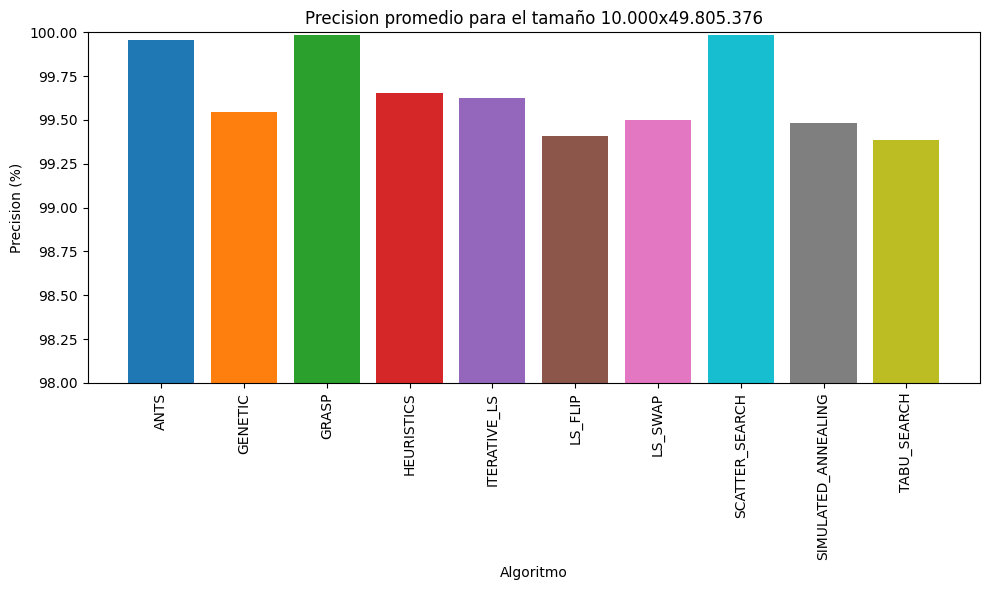

C:\Users\daniel\AppData\Local\Temp\ipykernel_31892\2847969378.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


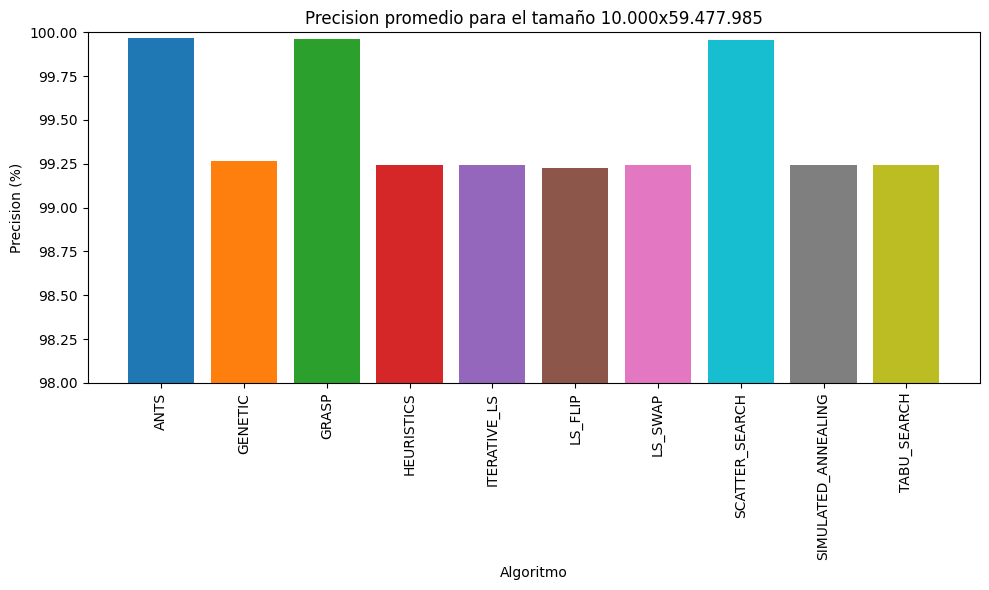

In [21]:
for x in nxC:
	plot_algorithms(df, x, 'nxC', 'Accuracy (%)', 'Precision promedio para el tamaño', 'Precision (%)', zoom=True, format_value=False)